<a href="https://colab.research.google.com/github/gunelatakishyeva/MachineLearningProjects/blob/main/Fuel_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/content/FuelConsumption (1).csv')
df

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


<Axes: xlabel='FUEL CONSUMPTION', ylabel='COEMISSIONS '>

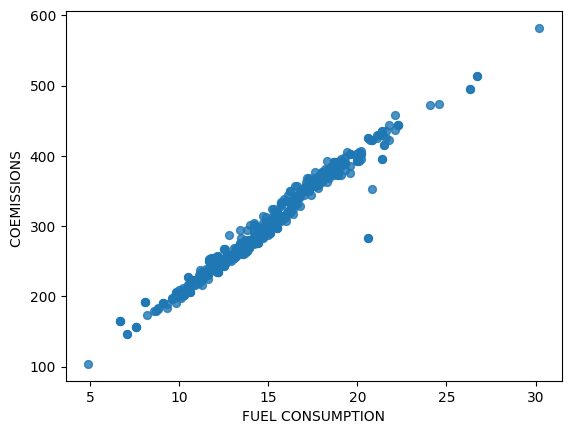

In [4]:
from matplotlib import pyplot as plt
df.plot(kind='scatter',x='FUEL CONSUMPTION',y='COEMISSIONS ',s=32,alpha=.8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.0+ KB


In [6]:
X=df.drop('FUEL CONSUMPTION',axis=1)
y=df['FUEL CONSUMPTION'].copy()

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((511, 9), (128, 9), (511,), (128,))

In [9]:
num_features=X_train.select_dtypes(include=[np.number]).columns
cat_features=X_train.select_dtypes(exclude=[np.number]).columns

In [10]:
num_features

Index(['Year', 'ENGINE SIZE', 'CYLINDERS', 'COEMISSIONS '], dtype='object')

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [12]:
num_pipeline=make_pipeline(SimpleImputer(strategy='median'))
cat_pipeline=make_pipeline(SimpleImputer(strategy='most_frequent'),
                           OneHotEncoder(handle_unknown='ignore'))
transformer=ColumnTransformer([
    ('num_pipeline',num_pipeline,num_features),
    ('cat_pipeline',cat_pipeline,cat_features)
])

In [13]:
X_transformed_train=transformer.fit_transform(X_train)
transformed_columns=transformer.get_feature_names_out()

In [14]:
transformed_columns

array(['num_pipeline__Year', 'num_pipeline__ENGINE SIZE',
       'num_pipeline__CYLINDERS', 'num_pipeline__COEMISSIONS ',
       'cat_pipeline__MAKE_ACURA', 'cat_pipeline__MAKE_AUDI',
       'cat_pipeline__MAKE_BMW', 'cat_pipeline__MAKE_BUICK',
       'cat_pipeline__MAKE_CADILLAC', 'cat_pipeline__MAKE_CHEVROLET',
       'cat_pipeline__MAKE_CHRYSLER', 'cat_pipeline__MAKE_DAEWOO',
       'cat_pipeline__MAKE_DODGE', 'cat_pipeline__MAKE_FERRARI',
       'cat_pipeline__MAKE_FORD', 'cat_pipeline__MAKE_GMC',
       'cat_pipeline__MAKE_HONDA', 'cat_pipeline__MAKE_HYUNDAI',
       'cat_pipeline__MAKE_INFINITI', 'cat_pipeline__MAKE_ISUZU',
       'cat_pipeline__MAKE_JAGUAR', 'cat_pipeline__MAKE_JEEP',
       'cat_pipeline__MAKE_KIA', 'cat_pipeline__MAKE_LAND ROVER',
       'cat_pipeline__MAKE_LEXUS', 'cat_pipeline__MAKE_LINCOLN',
       'cat_pipeline__MAKE_MAZDA', 'cat_pipeline__MAKE_MERCEDES-BENZ',
       'cat_pipeline__MAKE_NISSAN', 'cat_pipeline__MAKE_OLDSMOBILE',
       'cat_pipeline__MAKE_P

In [16]:
X_transformed_test=transformer.transform(X_test)

In [17]:
X_transformed_test_df=pd.DataFrame(X_transformed_test.toarray(),columns=transformed_columns)
X_transformed_test_df

,num_pipeline__Year,num_pipeline__ENGINE SIZE,num_pipeline__CYLINDERS,num_pipeline__COEMISSIONS,cat_pipeline__MAKE_ACURA,cat_pipeline__MAKE_AUDI,cat_pipeline__MAKE_BMW,cat_pipeline__MAKE_BUICK,cat_pipeline__MAKE_CADILLAC,cat_pipeline__MAKE_CHEVROLET,...,cat_pipeline__TRANSMISSION_A5,cat_pipeline__TRANSMISSION_AS4,cat_pipeline__TRANSMISSION_AS5,cat_pipeline__TRANSMISSION_M5,cat_pipeline__TRANSMISSION_M6,cat_pipeline__FUEL_D,cat_pipeline__FUEL_E,cat_pipeline__FUEL_N,cat_pipeline__FUEL_X,cat_pipeline__FUEL_Z
0,2000.0,3.8,6.0,269.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2000.0,3.5,6.0,366.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2000.0,2.7,4.0,301.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2000.0,5.5,12.0,495.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2000.0,2.4,5.0,288.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2000.0,4.3,8.0,292.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
124,2000.0,4.6,8.0,345.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125,2000.0,4.2,6.0,373.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
126,2000.0,2.5,4.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
from sklearn.tree import DecisionTreeRegressor

dcs_reg=DecisionTreeRegressor()
dcs_reg.fit(X_transformed_train,y_train)

DecisionTreeRegressor()

In [19]:
dcs_reg.score(X_transformed_test,y_test)

0.9810462579891299

In [20]:
dcs_reg.score(X_transformed_train,y_train)

1.0

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_reg=RandomForestRegressor()
rf_reg.fit(X_transformed_train,y_train)

RandomForestRegressor()

In [22]:
rf_reg.score(X_transformed_test,y_test)

0.9698626922788379

In [23]:
rf_reg.score(X_transformed_train,y_train)

0.9975505019451572

In [24]:
dcs_reg.feature_importances_

array([0.00000000e+00, 1.71379222e-03, 9.60671771e-04, 9.67769264e-01,
       5.22283819e-06, 0.00000000e+00, 4.79114483e-04, 0.00000000e+00,
       3.96609275e-05, 1.13128612e-04, 6.26689494e-05, 8.97659313e-05,
       3.49389461e-04, 6.82993862e-03, 3.63632098e-04, 1.11331492e-17,
       5.61144222e-06, 3.24619481e-05, 2.36426693e-05, 5.56657461e-18,
       1.04456764e-05, 1.56685146e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.89188860e-05, 1.30570955e-06,
       1.92187560e-04, 0.00000000e+00, 8.81353945e-07, 1.66306163e-05,
       2.18662826e-04, 0.00000000e+00, 2.57536860e-05, 4.36231342e-05,
       4.64713898e-05, 3.42987524e-04, 1.67591551e-04, 1.23312746e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00198343e-16, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.58643710e-05, 0.00000000e+00, 0.00000000e+00,
      

Text(0, 0.5, 'Feature')

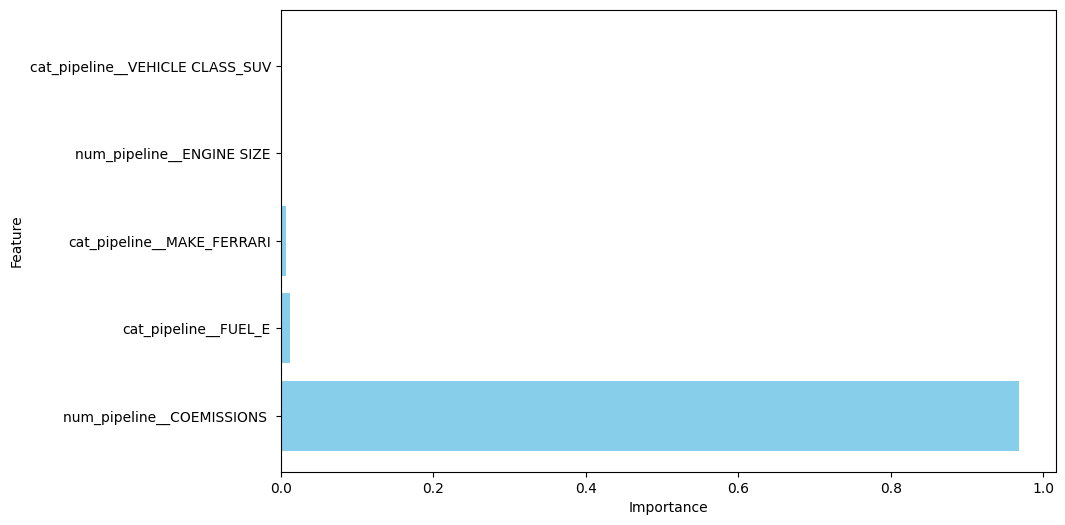

In [25]:
feature_importances=dcs_reg.feature_importances_

features_df=pd.DataFrame({
    'Feature':X_transformed_test_df.columns,
    'Importance':feature_importances
})


features_df=features_df.sort_values(by='Importance',ascending=False).head()

plt.figure(figsize=(10,6))
plt.barh(features_df['Feature'],features_df['Importance'],color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')


In [26]:
features_df

,Feature,Importance
3,num_pipeline__COEMISSIONS,0.967769
354,cat_pipeline__FUEL_E,0.012295
13,cat_pipeline__MAKE_FERRARI,0.006830
1,num_pipeline__ENGINE SIZE,0.001714
342,cat_pipeline__VEHICLE CLASS_SUV,0.001325


In [27]:
from sklearn.ensemble import VotingRegressor
voting_reg=VotingRegressor([
    ('dcs_reg',dcs_reg),
    ('rf_reg',rf_reg)
])
voting_reg.fit(X_transformed_train,y_train)

VotingRegressor(estimators=[('dcs_reg', DecisionTreeRegressor()),
                            ('rf_reg', RandomForestRegressor())])

In [28]:
voting_reg.score(X_transformed_test,y_test)

0.9777841257604412

In [29]:
voting_reg.score(X_transformed_train,y_train)

0.9993728424386439